In [5]:
import numpy as np
import math as m
import matplotlib as plt
import matplotlib.pyplot as pyplt
def euc_dist(v1, v2):
  return np.linalg.norm(v1 - v2)

def manhattan_dist(r1, c1, r2, c2):
  return np.abs(r1-r2) + np.abs(c1-c2)
def closest_node(single_data, map):
  # (row,col) of map node closest to data[t]
  m_rows=len(map)
  m_cols=len(map[0])
  result = [0,0]
  #initialize the closest distance as a big number
  closest_dist = 1.0e10
  for i in range(m_rows):
    for j in range(m_cols):
      cur_dist = euc_dist(map[i][j], single_data)
      #update if the distance of current node is smaller than current closest distance
      if cur_dist < closest_dist:
        closest_dist = cur_dist
        result = [i,j]
  return result


# Step1: Load the data from website
# Input data get from website
#Maroon, dark read brown red
#light coral, dark salmon
Input_data = [[128,0,0],
                [139,0,0],
                [165,42,42],
                [178,34,34],
                [220,20,60],
                [255,0,0],
                [0,128,0],
                [34,139,34],
                [0,255,0],
                [50,205,50],
                [144,238,144],
                [152,251,152],
                [135,206,235],
                [135,206,250],
                [25,25,112],
                [0,0,128],
                [0,0,139],
                [0,0,205],
                [0,0,255],
                [169,169,169],
                [192,192,192],
                [211,211,211],
                [220,220,220],
                [245,245,245],
                [255,255,255]
              ]
#Step2: Initialize the size of the grid and the dimension for each vecotr in grid
dimension = 3
row = 100
col = 100
# RangeMax = Rows + Cols
alpha0 = 0.5
max_epoch_T = 1000
sigma_list=[1,10,30,50,70]

# 2. construct the SOM and do the iteration for each sigma and epoach
# To speed up the algorithm I calculate a range of negiborhood and set it as 5*5 mat with the winning neuron
# on the center 2,2
# dist_map = np.zeros((5, 5, 1))
# for i in range(5):
#     for j in range(5):
#         dist_map[i, j] = m.sqrt(pow((i - 2), 2) + pow((j - 2), 2))

show_epoach=[20-1,40-1,100-1,1000-1]
print("Initialize parameters done")



Initialize parameters done


Initialize weights for a 100*100 SOM


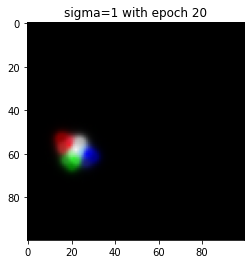

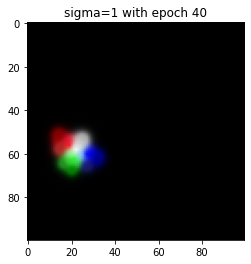

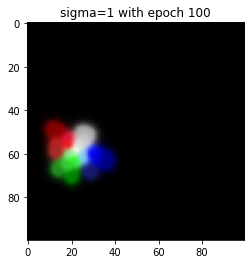

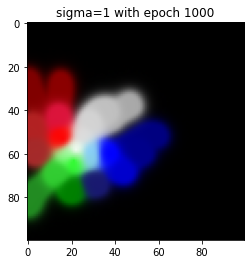

SOM construction complete 

Initialize weights for a 100*100 SOM


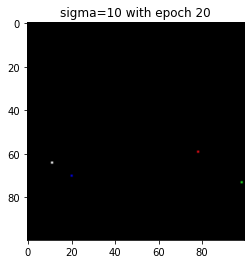

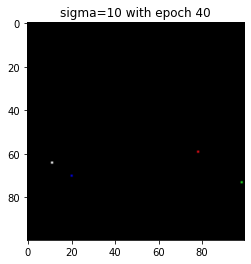

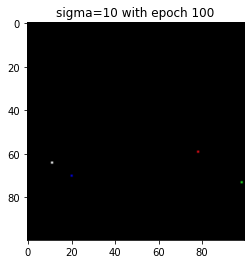

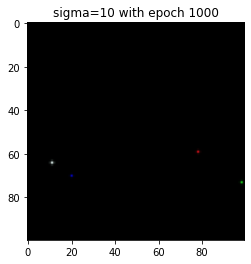

SOM construction complete 

Initialize weights for a 100*100 SOM


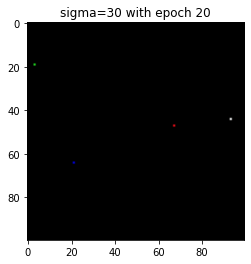

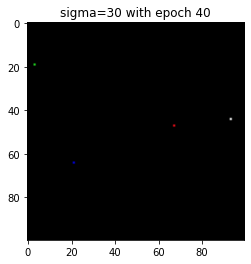

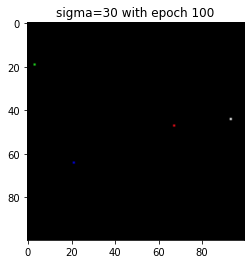

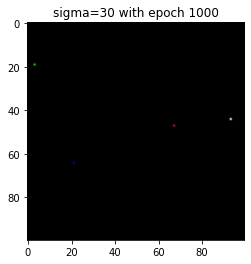

SOM construction complete 

Initialize weights for a 100*100 SOM


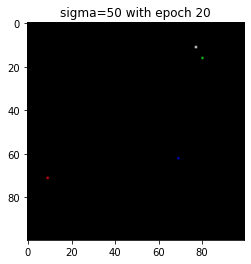

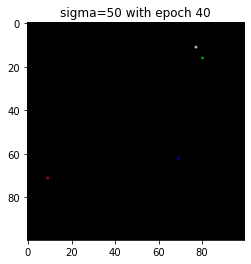

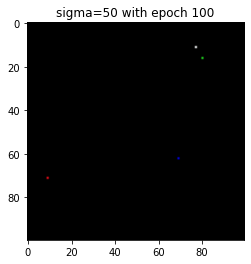

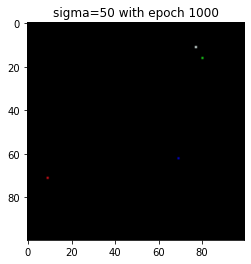

SOM construction complete 

Initialize weights for a 100*100 SOM


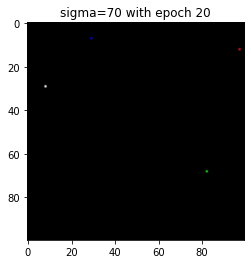

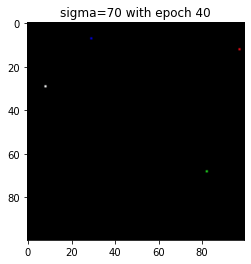

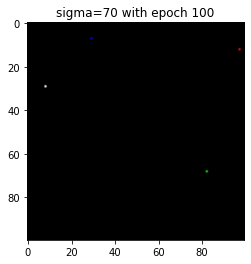

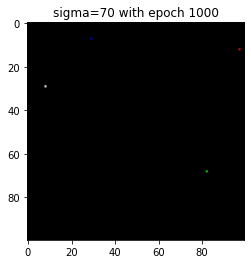

SOM construction complete 



In [6]:
for sigma0 in sigma_list:
    map = np.random.random_sample(size=(row, col, dimension))
    print("Initialize weights for a 100*100 SOM")
    for k in range(max_epoch_T):
        for t in range(len(Input_data)):
            # if s % (max_epoch_T / 10) == 0: print("step = ", str(s))
            #Calculate alpha
            alpha_k=alpha0*m.exp(-k/max_epoch_T)
            #Calculate winning neuron
            [closet_row, closet_col] = closest_node(Input_data[t], map)
            #Calculate neighborhood function
            ''' Range update I tried to use this but find it does not speed up my program significantly
            #Detect range
            row_left=max(0,closet_row-2)
            row_right=min(row-1,closet_row+2)
            col_left=max(0,closet_col-2)
            col_right=min(col-1,closet_col+2)
            center_row=2
            center_col=2
            if row_left>closet_row-2:
                center_row=closet_row-row_left
            if row_right<closet_row+2:
                center_row=4-(row_right-closet_row)
            if col_left>closet_col:
                center_col=closet_col-col_left
            if row_right<closet_row+2:
                center_col=4-(col_right-closet_col)

            temp_dis_map=dist_map[max(center_row-2,0):min(center_row+2,4)+1,max(center_col-2,0):min(center_col+2,4)+1]

            # dist_map=pow(map-map[closet_row, closet_col],2)
            sigma_k=sigma0*m.exp(-k/max_epoch_T)
            h_ij_k=np.exp(-temp_dis_map/2*pow(2,sigma_k))
            #Then update the map
            map[row_left:row_right+1,col_left:col_right+1]=map[row_left:row_right+1,col_left:col_right+1]+alpha_k*h_ij_k*(Input_data[t]-map[row_left:row_right+1,col_left:col_right+1])
        #The map number should be bounded
        # for i in range(row):
        #     for j in range(col):
        #         for index in range(dimension):
        #             if map[i,j,index]>255:
        #                 map[i, j, index]=255
        #             if map[i,j,index]<0:
        #                 map[i, j, index]=0
            '''
            dist_map = np.zeros((row, col, 1))
            for i in range(row):
                for j in range(col):
                    dist_map[i, j] = m.sqrt(pow((i - closet_row), 2) + pow((j - closet_col), 2))
            sigma_k = sigma0 * m.exp(-k / max_epoch_T)
            h_ij_k = np.exp(-dist_map / 2 * pow(2, sigma_k))
            map = map+ alpha_k * h_ij_k * (Input_data[t] - map)
        if k in show_epoach:
            #Normalize and show
            pyplt.imshow(map/255, cmap='gray')
            pyplt.title('sigma=%d with epoch %d'%(sigma0,k+1))
            pyplt.show()

    print("SOM construction complete \n")